In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger')
import imageio
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
# importing preliminaries
%pylab inline
import re
import math
import string
from collections import Counter
from nltk.probability import FreqDist
import seaborn as sns
import re
import math
import string
from collections import Counter
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn
#from __future__ import division

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\奥拉朱旺\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Populating the interactive namespace from numpy and matplotlib


In [2]:
data_1=pd.read_pickle('cleaned_df_final.pkl')
data_2=pd.read_csv('textResponses_graded.csv')

In [3]:
len(data_1)-len(data_2)

322

In [4]:
#data_2=data_2.iloc[:1450]
data_2=data_2[['Transaction Id','correctness','answerType']]

In [5]:
data=pd.merge(data_1,data_2,on='Transaction Id')

In [6]:
data.tail()

,Row,Transaction Id,Anon Student Id,Session Id,Time,Duration (sec),Student Response Subtype,Level (Assignment),Level (ProblemSet),Problem Name,...,CF (Team Position),CF (collaborating_sessions),CF (step_id),CF (tool_event_time),CF (tutor_event_time),word_list,num_list,symb_list,correctness,answerType
7002,1029681,c54a5c28bced19d58961535e46614ad2,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,S112d59de762cb6b27718fd92dc970abc,5/19/16 9:12,8.8,NaN,Comparing Erroneous Collaboration,Erroneous_Comparing_Collaboration,6a,...,1 of 2,"S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...",32.0,2016-05-19 13:12:37.259 UTC,2016-05-19 13:12:37.275 UTC,"[use, the, same, least, common, denominator]",[],[],0,NaN
7003,1029721,57973b31d8c3c6e36d2665f6247f6f8b,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,S112d59de762cb6b27718fd92dc970abc,5/19/16 9:13,6.75,Student1,Comparing Erroneous Collaboration,Erroneous_Comparing_Collaboration,7a,...,1 of 2,"S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...",32.0,2016-05-19 13:13:55.28 UTC,2016-05-19 13:13:55.28 UTC,"[don't, add, the, numerator]",[],[],0,NaN
7004,1029793,1ac1c571e80971e2f51a8839132b807c,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,S112d59de762cb6b27718fd92dc970abc,5/19/16 9:17,13.75,Student1,Comparing Erroneous Collaboration,Erroneous_Comparing_Collaboration,8a,...,1 of 2,"S7c153e885bb28b9baeb781b48cbd5527,S112d59de762...",32.0,2016-05-19 13:17:01.843 UTC,2016-05-19 13:17:01.859 UTC,"[the, larger, denominator, does, not, always, ...",[],[],0,NaN
7005,1030198,e10dce32b913fc822b5df17cb513e16f,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,Sc03f3121c394179d88011f7f77ce420a,5/20/16 8:58,47.5,NaN,Show what you learned A,Assessment_A,5,...,NaN,NaN,236.0,2016-05-20 12:58:53.910 UTC,2016-05-20 12:58:53.911 UTC,"[it, cannot, be, 6/13, FRACTION, because, of, ...","[6, 13]",[/],1,v
7006,1030200,53406cfa5946f9f896abedeb214aaa55,Stu_ffe4ba291fd0ec27d27a34dcceb3a617,Sc03f3121c394179d88011f7f77ce420a,5/20/16 8:59,26.5,NaN,Show what you learned A,Assessment_A,6,...,NaN,NaN,236.0,2016-05-20 12:59:54.615 UTC,2016-05-20 12:59:54.633 UTC,"[32/65, FRACTION, be, smaller, because, it, be...","[32, 65]",[/],1,p


In [7]:
data.columns

Index(['Row', 'Transaction Id', 'Anon Student Id', 'Session Id', 'Time',
       'Duration (sec)', 'Student Response Subtype', 'Level (Assignment)',
       'Level (ProblemSet)', 'Problem Name', 'Problem View',
       'Problem Start Time', 'Step Name', 'Attempt At Step', 'Is Last Attempt',
       'Outcome', 'Selection', 'Input', 'Input.1', 'KC (Default)',
       'KC (Unique-step)', 'School', 'Class', 'CF (Completion History)',
       'CF (Team ID)', 'CF (Team Position)', 'CF (collaborating_sessions)',
       'CF (step_id)', 'CF (tool_event_time)', 'CF (tutor_event_time)',
       'word_list', 'num_list', 'symb_list', 'correctness', 'answerType'],
      dtype='object')

In [8]:
data['Attempt At Step'].value_counts()

1     6712
2      160
3       37
4       36
6       22
5        8
7        7
9        5
10       4
8        4
14       2
23       2
13       2
11       2
12       2
24       1
27       1
Name: Attempt At Step, dtype: int64

In [9]:
data['answerType'].value_counts().index

Index(['p', 'c', 'n', 'u', 'v', 'c '], dtype='object')

In [10]:
for i in range(len(data)):
    if data.answerType[i]=='c ':
        data.answerType[i]='c'

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC

In [12]:
all_words=[]
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    for temp_word in temp_word_list:
        if not (temp_word in all_words):
            all_words.append(temp_word)
               

In [13]:
data['answer']=''
for i in range(len(data)):
    temp_word_list=data.word_list[i]
    temp_answer=''
    for temp_word in temp_word_list:
        temp_answer=temp_answer+temp_word+' '
    temp_answer=temp_answer[:-1]
    data['answer'][i]=temp_answer

D:\anaconda\envs\torch\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
select_index=[]
for i in range(len(data)):
    if type(data.answerType.iloc[i]) ==str:
        select_index.append(i)

In [15]:
new_data=data.iloc[select_index]

In [16]:
new_data.answerType.value_counts()

p    888
c    268
n    143
u     75
v     74
Name: answerType, dtype: int64

In [17]:
new_data.to_csv('chili_final.csv',index=False) 

In [18]:
data.answer[1]

'i do not know the answer'

In [19]:
select_rows=[]
for i in range(len(data)):
    if data.answerType[i] in ['p','c','n','u','v']:
        select_rows.append(i)
data=data.iloc[select_rows]

In [20]:
data.correctness.value_counts()

1    900
0    548
Name: correctness, dtype: int64

In [21]:
data.answerType.value_counts()

p    888
c    268
n    143
u     75
v     74
Name: answerType, dtype: int64

# TFIDF with naive Bayes with raw input

In [25]:
f_train = data.iloc[:1352][ 'Input'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'Input'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [26]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)
print(train_vectors.shape, test_vectors.shape)

(1352, 1366) (95, 1366)


In [27]:
from  sklearn.metrics  import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with bayes classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with bayes classifier: 0.7368421052631579
f1 score of correctness classification with bayes classifier: 0.8120300751879699


### answer type

In [28]:
clf = MultinomialNB().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with bayes classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of answer type classification with bayes classifier: 0.7052631578947368


# TFIDF and naive bayes with processed answer

In [29]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [30]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [31]:
from  sklearn.metrics  import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with bayes classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with bayes classifier: 0.7368421052631579
f1 score of correctness classification with bayes classifier: 0.7967479674796749


### answer type

In [32]:
clf = MultinomialNB().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with bayes classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of answer type classification with bayes classifier: 0.7157894736842105


# tfidf and Bernoulli for raw answer

In [33]:
f_train = data.iloc[:1352][ 'Input'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'Input'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [34]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [35]:
from  sklearn.metrics  import accuracy_score, f1_score
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with Bernoulli classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with Bernoulli classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with Bernoulli classifier: 0.8
f1 score of correctness classification with Bernoulli classifier: 0.8288288288288288


### answer type

In [36]:
clf = BernoulliNB().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with Bernoulli classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of answer type classification with Bernoulli classifier: 0.7263157894736842


# tfidf and Bernoulli for processed answer

In [37]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [38]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [39]:
from  sklearn.metrics  import accuracy_score, f1_score
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with Bernoulli classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with Bernoulli classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with Bernoulli classifier: 0.7894736842105263
f1 score of correctness classification with Bernoulli classifier: 0.8113207547169811


### answer type

In [40]:
clf = BernoulliNB().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with Bernoulli classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with bayes classifier: '+str(f1_score(c_test,predicted)))

accuracy of answer type classification with Bernoulli classifier: 0.6736842105263158


# Tfidf and logistic regression with proccessed answer

In [41]:
from sklearn.linear_model import LogisticRegression,SGDClassifier

In [42]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [43]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [44]:
from  sklearn.metrics  import accuracy_score, f1_score
clf = LogisticRegression().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with logistic classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with logistic classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with logistic classifier: 0.8210526315789474
f1 score of correctness classification with logistic classifier: 0.8495575221238938


D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### answer type

In [45]:
from  sklearn.metrics  import accuracy_score, f1_score
clf = LogisticRegression().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with logistic classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of correctness classification with logistic classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with logistic classifier: 0.7578947368421053


D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# Tfidf and logistic regression with raw answer

In [46]:
f_train = data.iloc[:1352][ 'Input'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'Input'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [47]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [48]:
from  sklearn.metrics  import accuracy_score, f1_score
clf = LogisticRegression().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with logistic classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with logistic classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with logistic classifier: 0.8
f1 score of correctness classification with logistic classifier: 0.8347826086956522


D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### answer type

In [49]:
from  sklearn.metrics  import accuracy_score, f1_score
clf = LogisticRegression().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with logistic classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of correctness classification with logistic classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with logistic classifier: 0.7473684210526316


D:\anaconda\envs\torch\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [50]:
#clf.show_most_informative_features(15)

# tdidf and support vector machine for raw answer

In [51]:
f_train = data.iloc[:1352][ 'Input'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'Input'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [52]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [53]:
clf = LinearSVC().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with svc classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with svc classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with svc classifier: 0.8421052631578947
f1 score of correctness classification with svc classifier: 0.8598130841121496


### answer type

In [54]:
clf = LinearSVC().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with svc classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with svc classifier: 0.7789473684210526


# tdidf and support vector machine for processed answer

In [55]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [56]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [57]:
clf = LinearSVC().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with svc classifier: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with svc classifier: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with svc classifier: 0.8421052631578947
f1 score of correctness classification with svc classifier: 0.8648648648648649


### answer type

In [58]:
clf = LinearSVC().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with svc classifier: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with svc classifier: 0.7684210526315789


# TFIDF and decision tree for raw answer

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
f_train = data.iloc[:1352][ 'Input'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'Input'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [61]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [62]:
clf = DecisionTreeClassifier().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with decision tree: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with decision tree: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with decision tree: 0.7157894736842105
f1 score of correctness classification with decision tree: 0.7476635514018692


### answer type

In [63]:
clf = DecisionTreeClassifier().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with decision tree: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with decision tree: 0.6947368421052632


# TFIDF and decision tree for processed answer

In [64]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [65]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [66]:
clf = DecisionTreeClassifier().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with decision tree: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with decision tree: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with decision tree: 0.6736842105263158
f1 score of correctness classification with decision tree: 0.6990291262135923


### answer type

In [67]:
clf = DecisionTreeClassifier().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with decision tree: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with decision tree: 0.6947368421052632


In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(at_test,predicted))

              precision    recall  f1-score   support

           c       0.50      0.80      0.62         5
           n       0.83      0.62      0.71         8
           p       0.89      0.81      0.85        31
           u       0.00      0.00      0.00         2
           v       0.17      0.50      0.25         2

    accuracy                           0.73        48
   macro avg       0.48      0.55      0.49        48
weighted avg       0.77      0.73      0.74        48



D:\anaconda\envs\ntds\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# TFIDF and random forest for processed answer

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
f_train = data.iloc[:1352][ 'answer'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'answer'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [70]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [71]:
clf = RandomForestClassifier().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with decision tree: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with decision tree: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with decision tree: 0.7894736842105263
f1 score of correctness classification with decision tree: 0.8245614035087719


D:\anaconda\envs\torch\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### answer type

In [72]:
clf = RandomForestClassifier().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with decision tree: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with decision tree: 0.7263157894736842


D:\anaconda\envs\torch\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# TFIDF and random forest for raw answer

In [73]:
f_train = data.iloc[:1352][ 'Input'].values
c_train = data.iloc[:1352]['correctness'].values
at_train = data.iloc[:1352][ 'answerType'].values
f_test = data.iloc[1353:][ 'Input'].values
c_test = data.iloc[1353:]['correctness'].values
at_test = data.iloc[1353:]['answerType'].values

### correctness

In [74]:
vectorizer = TfidfVectorizer()
train_vectors = vectorizer.fit_transform(f_train)
test_vectors = vectorizer.transform(f_test)

In [75]:
clf = RandomForestClassifier().fit(train_vectors, c_train)
predicted = clf.predict(test_vectors)
print('accuracy of correctness classification with decision tree: '+str(accuracy_score(c_test,predicted)))
print('f1 score of correctness classification with decision tree: '+str(f1_score(c_test,predicted)))

accuracy of correctness classification with decision tree: 0.7578947368421053
f1 score of correctness classification with decision tree: 0.7999999999999999


D:\anaconda\envs\torch\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### answer type

In [76]:
clf = RandomForestClassifier().fit(train_vectors, at_train)
predicted = clf.predict(test_vectors)
print('accuracy of answer type classification with decision tree: '+str(accuracy_score(at_test,predicted)))
#print('f1 score of answer type classification with svc classifier: '+str(f1_score(at_test,predicted)))

accuracy of answer type classification with decision tree: 0.7263157894736842


D:\anaconda\envs\torch\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


## most informative features in classification

In [23]:
def get_tfidf_dic(array):
    temp_dict={}
    names=vectorizer.get_feature_names()
    for i in range(len(names)):
        temp_dict[names[i]]=array[i]
    return temp_dict

In [24]:
train_set=[(get_tfidf_dic(train_vectors.toarray()[i]), at_train[i])  for i in range(train_vectors.shape[0])]

In [25]:
dt_cls=nltk.NaiveBayesClassifier.train(train_set)

In [26]:
dt_cls.show_most_informative_features(5)

Most Informative Features
                   piece = 0.4378860785761671      c : p      =     10.3 : 1.0
                  bigger = 0.3518819571997357      c : p      =      9.3 : 1.0
                     the = 0.0                 p : v      =      8.9 : 1.0
                 smaller = 0.30359813944714503      c : p      =      8.6 : 1.0
             denominator = 0.23073479097418015      c : p      =      7.4 : 1.0


In [27]:
info_f=dt_cls.most_informative_features(100)

In [28]:
info_fs=[temp[0] for temp in info_f]

In [29]:
info_text=''
for temp_word in info_fs:
    info_text=info_text+temp_word+' '

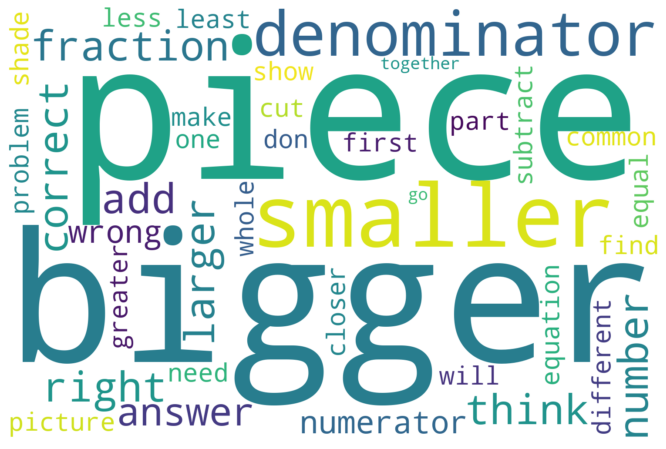

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wc = WordCloud(background_color="white",width=1500, height=1000, margin=2).generate(info_text)
plt.figure(figsize=(15, 8))
plt.imshow(wc,  interpolation="bilinear",vmax=1000)
plt.axis('off')
plt.show()

In [76]:
dt_cls=nltk.DecisionTreeClassifier.train(train_set)
dt_cls.most_informative_features(5)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'most_informative_features'